 ______  ___     ______                        _________
___   |/  /________  /_______ _______ ______________  /
__  /|_/ /_  __ \_  __ \  __ `/_  __ `__ \  _ \  __  / 
_  /  / / / /_/ /  / / / /_/ /_  / / / / /  __/ /_/ /  
/_/  /_/  \____//_/ /_/\__,_/ /_/ /_/ /_/\___/\__,_/   
                                                       
_____________ _________      ___________        _________            
___    |__  /_______  /_____ ___  /__  /_______ ______  /____________
__  /| |_  __ \  __  /_  __ `/_  /__  //_/  __ `/  __  /_  _ \_  ___/
_  ___ |  /_/ / /_/ / / /_/ /_  / _  ,<  / /_/ // /_/ / /  __/  /    
/_/  |_/_.___/\__,_/  \__,_/ /_/  /_/|_| \__,_/ \__,_/  \___//_/     
                                                                     



## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

## Read Data

In [3]:
df = pd.read_csv(r"student_dropout.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Analysis & Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
df["Target"].value_counts() # Unbalanced Data

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [7]:
df["Target"].replace({"Dropout":0, "Enrolled":1, "Graduate":2}, inplace=True)

In [8]:
for col in df.columns:
    print(f"> {str(col).ljust(50)} has {len(df[col].unique())} unique values")

> Marital status                                     has 6 unique values
> Application mode                                   has 18 unique values
> Application order                                  has 8 unique values
> Course                                             has 17 unique values
> Daytime/evening attendance	                        has 2 unique values
> Previous qualification                             has 17 unique values
> Previous qualification (grade)                     has 101 unique values
> Nacionality                                        has 21 unique values
> Mother's qualification                             has 29 unique values
> Father's qualification                             has 34 unique values
> Mother's occupation                                has 32 unique values
> Father's occupation                                has 46 unique values
> Admission grade                                    has 620 unique values
> Displaced                            

In [9]:
corr = df.corr()["Target"].sort_values()
corr

Age at enrollment                                -0.243438
Debtor                                           -0.240999
Gender                                           -0.229270
Application mode                                 -0.221747
Curricular units 2nd sem (without evaluations)   -0.094028
Marital status                                   -0.089804
Curricular units 1st sem (without evaluations)   -0.068702
Previous qualification                           -0.056039
Mother's qualification                           -0.043178
Inflation rate                                   -0.026874
Nacionality                                      -0.014801
Educational special needs                        -0.007353
Mother's occupation                              -0.005629
Father's occupation                              -0.001899
Father's qualification                           -0.001393
International                                     0.003934
Unemployment rate                                 0.0086

In [10]:
for col in df.columns:
    if abs(corr[col]) < 0.1:
        df.drop([col], axis=1, inplace=True)

In [11]:
# # # Drop columns depending on random forest feature importance (After dropping gives about 65 random forest accurecy)

# cols_to_be_dropped =   ['Curricular units 2nd sem (without evaluations)', 
#                         'Curricular units 2nd sem (credited)', 
#                         'Curricular units 1st sem (without evaluations)', 
#                         'Curricular units 1st sem (credited)', 
#                         'International', 
#                         'Educational special needs', 
#                         'Displaced', 
#                         'Nacionality', 
#                         'Previous qualification', 
#                         'Daytime/evening attendance	', 
#                         'Marital status', ]
# df.drop(cols_to_be_dropped, axis=1, inplace=True)

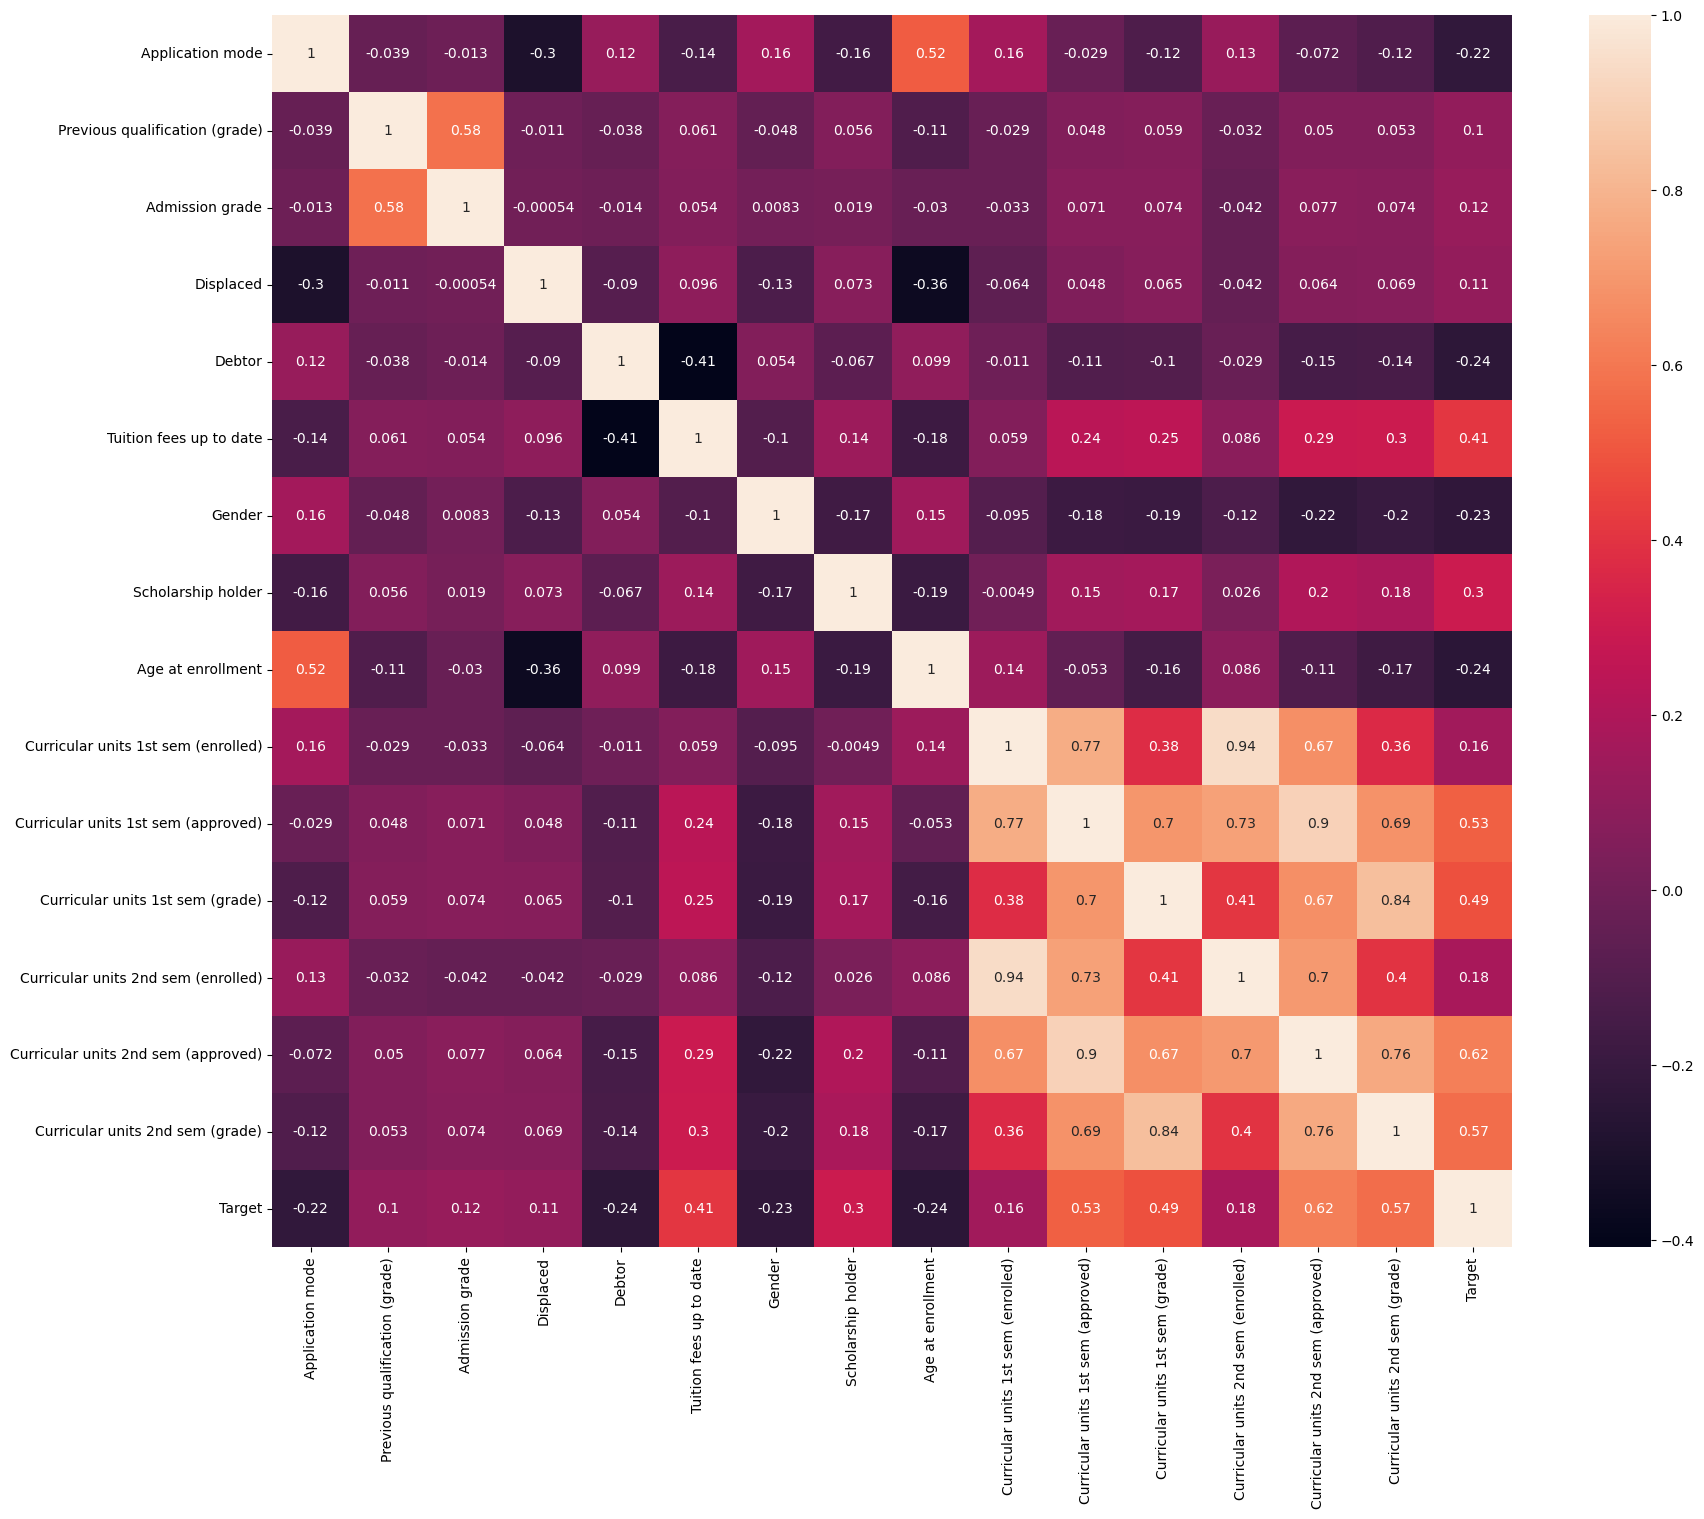

In [12]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
df.corr()["Target"].sort_values()

Age at enrollment                     -0.243438
Debtor                                -0.240999
Gender                                -0.229270
Application mode                      -0.221747
Previous qualification (grade)         0.103764
Displaced                              0.113986
Admission grade                        0.120889
Curricular units 1st sem (enrolled)    0.155974
Curricular units 2nd sem (enrolled)    0.175847
Scholarship holder                     0.297595
Tuition fees up to date                0.409827
Curricular units 1st sem (grade)       0.485207
Curricular units 1st sem (approved)    0.529123
Curricular units 2nd sem (grade)       0.566827
Curricular units 2nd sem (approved)    0.624157
Target                                 1.000000
Name: Target, dtype: float64

In [14]:
def get_outliers(col, multiplier=3, train_df = df): # 1.5
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    iqr_outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    
    return lower_bound, upper_bound, len(iqr_outliers)


for col in df.columns:
    if len(df[col].unique()) > 50:
        lower_bound, upper_bound, outliers = get_outliers(col)
        print(f"Num of outliers by IQR ({str(col.split("sem")[-1]).center(30)}) : ", str(outliers).rjust(4), f"Lower = {str(round(lower_bound, 3)).rjust(10)}", f"Upper = {str(round(upper_bound, 2)).rjust(10)}")        
        # Handling (But I will not handle it because a lot of data will be dropped!)
        # df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

Num of outliers by IQR (Previous qualification (grade)) :     3 Lower =       80.0 Upper =      185.0
Num of outliers by IQR (       Admission grade        ) :     3 Lower =       67.2 Upper =      185.5
Num of outliers by IQR (            (grade)           ) :   718 Lower =        3.8 Upper =       20.6
Num of outliers by IQR (            (grade)           ) :   870 Lower =        3.0 Upper =      21.08


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Target"], axis=1), df["Target"], random_state=42, test_size = 0.2)

In [16]:
from sklearn.preprocessing import StandardScaler, power_transform

scaler = StandardScaler()
X_train  = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test   = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

## Modeling

In [17]:
labels = {0:"Dropout", 1:"Enrolled", 2:"Graduate"}

def display_convMatrix():
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

def display_predictions(num=10):
    print(f"***** Predictions  *****")
    for real_value, predicted_value in list(zip(y_test, y_pred))[:num]:
        print(f"Real : {real_value} | Predicted : {predicted_value}")
    print()

def evaluate():
    print(f"** Evaluation **")
    print(f"Accuracy  : {round(accuracy_score(y_test, y_pred), 2)}")
    print(f"Precision : {round(precision_score(y_test, y_pred, average='weighted'), 2)}")
    print(f"Recall    : {round(recall_score(y_test, y_pred, average='weighted'), 2)}")
    print(f"F1        : {round(f1_score(y_test, y_pred, average='weighted'), 2)}")
    print()

def cross_validation(model):
    print(f"** Cross Validation Scores **")
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

    print("Cross-validation scores for each fold :", np.round(cv_scores, 2))
    print("Mean cross-validation accuracy        :", round(cv_scores.mean(), 2))

### Logistic Regression

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  # Fitting Logistic Regression

LogisticRegression()

In [19]:
y_pred = log_reg.predict(X_test)

evaluate()
display_predictions()
cross_validation(log_reg)

** Evaluation **
Accuracy  : 0.75
Precision : 0.73
Recall    : 0.75
F1        : 0.73

***** Predictions  *****
Real : 0 | Predicted : 0
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2
Real : 0 | Predicted : 0
Real : 2 | Predicted : 1
Real : 1 | Predicted : 2
Real : 0 | Predicted : 2
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2

** Cross Validation Scores **
Cross-validation scores for each fold : [0.74 0.79 0.77 0.78 0.76]
Mean cross-validation accuracy        : 0.77


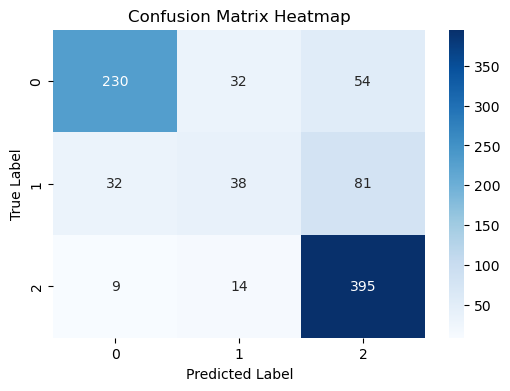

In [20]:
display_convMatrix()

### K-Nearest Neighbors (KNN)

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)  # Fitting KNN

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test)

evaluate()
display_predictions()
cross_validation(knn)

** Evaluation **
Accuracy  : 0.73
Precision : 0.72
Recall    : 0.73
F1        : 0.71

***** Predictions  *****
Real : 0 | Predicted : 0
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2
Real : 0 | Predicted : 0
Real : 2 | Predicted : 2
Real : 1 | Predicted : 2
Real : 0 | Predicted : 2
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2

** Cross Validation Scores **
Cross-validation scores for each fold : [0.71 0.73 0.71 0.71 0.69]
Mean cross-validation accuracy        : 0.71


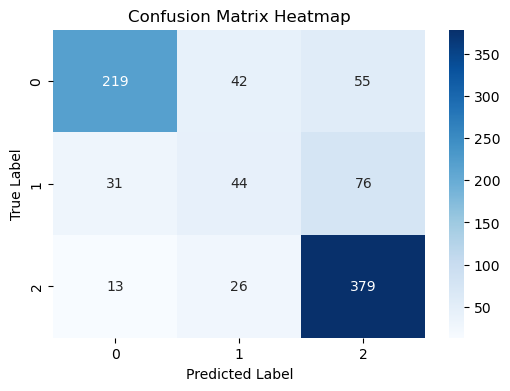

In [23]:
display_convMatrix()

### Support Vector Machine (SVM)

In [24]:
svm = SVC()
svm.fit(X_train, y_train)  # Fitting SVM

SVC()

In [25]:
y_pred = svm.predict(X_test)

evaluate()
display_predictions()
cross_validation(svm)

** Evaluation **
Accuracy  : 0.75
Precision : 0.75
Recall    : 0.75
F1        : 0.74

***** Predictions  *****
Real : 0 | Predicted : 0
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2
Real : 0 | Predicted : 0
Real : 2 | Predicted : 1
Real : 1 | Predicted : 2
Real : 0 | Predicted : 2
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2

** Cross Validation Scores **
Cross-validation scores for each fold : [0.75 0.78 0.76 0.75 0.75]
Mean cross-validation accuracy        : 0.76


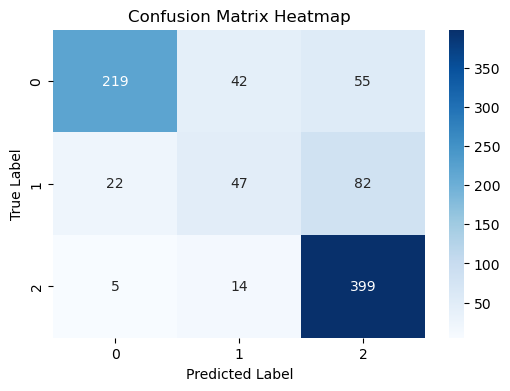

In [26]:
display_convMatrix()

### Decision Trees

In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)  # Fitting Decision Trees

DecisionTreeClassifier()

In [28]:
y_pred = decision_tree.predict(X_test)

evaluate()
display_predictions()
cross_validation(decision_tree)

** Evaluation **
Accuracy  : 0.68
Precision : 0.69
Recall    : 0.68
F1        : 0.68

***** Predictions  *****
Real : 0 | Predicted : 0
Real : 2 | Predicted : 2
Real : 2 | Predicted : 1
Real : 2 | Predicted : 2
Real : 0 | Predicted : 0
Real : 2 | Predicted : 0
Real : 1 | Predicted : 2
Real : 0 | Predicted : 2
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2

** Cross Validation Scores **
Cross-validation scores for each fold : [0.69 0.67 0.67 0.7  0.65]
Mean cross-validation accuracy        : 0.68


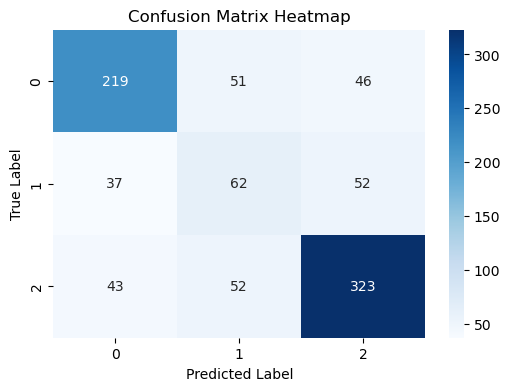

In [29]:
display_convMatrix()

### Random Forest

In [30]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)  # Fitting Random Forest

RandomForestClassifier()

In [31]:
y_pred = random_forest.predict(X_test)

evaluate()
display_predictions()
cross_validation(random_forest)

** Evaluation **
Accuracy  : 0.76
Precision : 0.74
Recall    : 0.76
F1        : 0.74

***** Predictions  *****
Real : 0 | Predicted : 0
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2
Real : 0 | Predicted : 0
Real : 2 | Predicted : 1
Real : 1 | Predicted : 2
Real : 0 | Predicted : 2
Real : 2 | Predicted : 2
Real : 2 | Predicted : 2

** Cross Validation Scores **
Cross-validation scores for each fold : [0.75 0.79 0.76 0.77 0.76]
Mean cross-validation accuracy        : 0.77


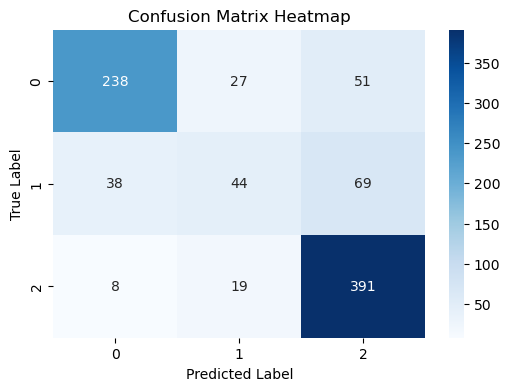

In [32]:
display_convMatrix()

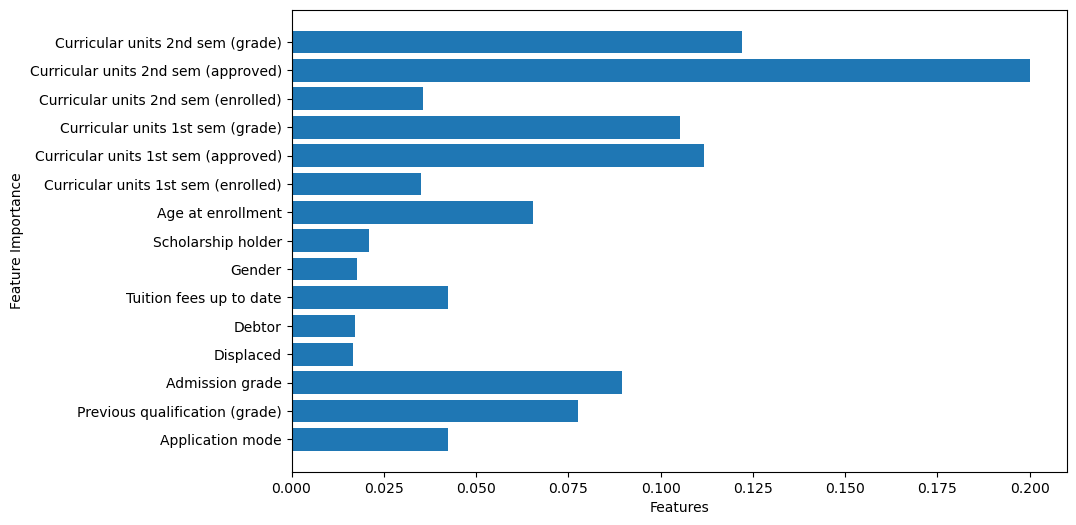

In [33]:
feature_importances = random_forest.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()